# **Customer LifeTime Value**

[Sumber Dataset Customer LifeTime Value](https://docs.google.com/document/d/1pEckO_D4vdUk_bIZX-lkmghmMX30WyPu/edit?usp=drive_link&ouid=116686943531344751554&rtpof=true&sd=true)

## **Business Understanding**

---

### **Context**

`Customer Lifetime Value`, atau `CLV`, adalah sebuah ukuran tentang seberapa berharganya seorang pelanggan bagi sebuah perusahaan. Dari nilai ini, perusahaan bisa menentukan berapa banyak keuntungan yang diperoleh dari satu pelanggan serta biaya yang dikeluarkan untuk mendapatkan atau mempertahankan pelanggan baru. Angka ini cukup penting bagi sebuah perusahaan untuk diketahui, terutama jika perusahaan ingin menargetkan pemasaran secara efektif kepada pelanggan yang bernilai tinggi, serta memahami bagaimana perubahan pelanggan perusahaan di masa depan.

### **Problem Statement**

Perusahaan tahu bahwa `Customer Lifetime Value (CLV)` penting untuk mengukur seberapa berharganya seorang pelanggan. Dengan `CLV`, perusahaan bisa menilai berapa keuntungan yang diperoleh dari tiap pelanggan serta biaya yang harus dikeluarkan untuk mendapatkan atau mempertahankan mereka para nasabah. Masalahnya, perusahaan belum punya cara otomatis untuk memprediksi nilai `CLV` dari setiap pelanggan berdasarkan data yang tersedia. Akibatnya, perusahaan kesulitan untuk menargetkan pemasaran secara efektif ke pelanggan bernilai tinggi dan juga kurang siap dalam memahami bagaimana perubahan basis pelanggan bisa terjadi di masa depan.

### **Goals**

Tujuan dari proyek ini adalah membangun model prediksi untuk `Customer Lifetime Value (CLV)` berdasarkan data pelanggan yang sudah tersedia, seperti **Vehicle Class**, **Coverage**, **Employment Status**, **Income**, **Monthly Premium Auto**, hingga **Total Claim Amount** Dan masih banyak lagi. Dengan adanya model ini, perusahaan dapat:

1. Mengidentifikasi pelanggan dengan nilai CLV tinggi yang layak diprioritaskan dalam program retensi.
2. Mengoptimalkan strategi pemasaran dengan mengarahkan sumber daya pada pelanggan yang paling menguntungkan.
3. Mengurangi biaya akuisisi dengan fokus pada segmen pelanggan yang bernilai tinggi.
4. Memahami faktor faktor utama yang memengaruhi nilai pelanggan, sehingga mendukung pengambilan keputusan bisnis yang lebih tepat dan berorientasi jangka panjang.


### **Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data pelanggan untuk menemukan pola dari fitur fitur yang ada, yang membedakan satu pelanggan dengan pelanggan lainnya dalam hal nilai seumur hidup (Customer Lifetime Value).

Selanjutnya, kita akan membangun suatu model regresi yang dapat membantu perusahaan dalam memprediksi nilai CLV dari pelanggan baru maupun pelanggan yang sudah ada. Hasil prediksi ini dapat menjadi tool bagi perusahaan untuk mengidentifikasi pelanggan bernilai tinggi, merancang strategi retensi yang lebih efektif, serta mengoptimalkan alokasi biaya pemasaran.


### **Metric Evaluation**

Dalam mengevaluasi performa model regresi yang dibangun, akan digunakan beberapa metrik, yaitu **Root Mean Squared Error** (RMSE), **Mean Absolute Error** (MAE), dan **Mean Absolute Percentage Error** (MAPE). **RMSE** mengukur rata rata akar kuadrat dari selisih antara nilai aktual dan prediksi, sedangkan **MAE** menghitung rata rata selisih absolutnya. **MAPE** digunakan untuk melihat seberapa besar rata rata kesalahan model dalam bentuk persentase terhadap nilai aktual. Semakin kecil nilai dari ketiga metrik ini, semakin baik pula kemampuan model dalam melakukan prediksi.

Selain itu, apabila model linear dipilih sebagai model akhir, evaluasi juga akan mempertimbangkan **R-squared** dan **Adjusted R-squared**. Nilai ini menunjukkan seberapa besar variasi data yang dapat dijelaskan oleh model. Semakin mendekati angka 1, semakin baik model dalam merepresentasikan data. Namun demikian, perlu dicatat bahwa metrik ini kurang relevan untuk model non linear, sehingga penggunaannya hanya bersifat opsional sesuai jenis algoritma yang dipakai.

---

In [3]:
# Import Library yang dibutuhkan pada projecy ini

# --- Data Manipulation ---
import pandas as pd
import numpy as np
import datetime as dt

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')

## **Data Understanding**

---

### **Information Dataset**

- Dataset ini berasal dari **Insurance Dataset (Customer Lifetime Value)**
- Setiap baris nya merepresentasikan satu pelanggan.
- Setiap kolomnya merupakan fitur atau atribut dari pelanggan tersebut.


#### **Attribute Information**

| Fitur                   | Tipe Data   | Deskripsi                                                                 |
|--------------------------|-------------|---------------------------------------------------------------------------|
| Vehicle Class            | Object      | Jenis kendaraan yang dimiliki pelanggan.                                  |
| Coverage                 | Object      | Tingkat cakupan polis.                                                    |
| Renew Offer Type         | Object      | Jenis penawaran perpanjangan polis.                                       |
| Employment Status        | Object      | Status pekerjaan pelanggan.                                               |
| Marital Status           | Object      | Status perkawinan.                                                        |
| Education                | Object      | Tingkat pendidikan pelanggan.                                             |
| Number of Policies       | Integer     | Jumlah polis aktif yang dimiliki pelanggan.                               |
| Monthly Premium Auto     | Integer     | Premi bulanan yang dibayar pelanggan untuk asuransi mobil.                |
| Total Claim Amount       | Float       | Total nilai klaim yang pernah diajukan pelanggan.                         |
| Income                   | Integer     | Pendapatan tahunan pelanggan.                                             |
| Customer Lifetime Value  | Float       | Estimasi nilai seumur hidup pelanggan (variabel target untuk regresi).    |

### **Dataset Overview**

In [4]:
# Csv File Path
file_path = 'Dataset/data_customer_lifetime_value.csv'

# Load Dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris teratas dan terbawah dari dataset
display(df.head(), df.tail())

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940
5668,Luxury SUV,Basic,Offer2,Employed,Divorced,College,1.0,199.0,161.615740,60184.0,7664.219255


In [5]:
# Melihat informasi singkat dataset
df.info()
print(f'Jumlah baris dan kolom: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB
Jumlah baris dan kolom: (5669, 11)


In [6]:
# Statistik deskriptif fitur numerik dan kategorikal
display(df.describe(), df.describe(include=['O']))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


**Insight**

Berdasarkan statistik deskriptif, mayoritas pelanggan hanya memiliki 1 - 2 polis dengan premi bulanan di bawah 110, dan nilai klaim yang cukup bervariasi. Nilai Customer Lifetime Value (CLV) rata rata sekitar 8.000, namun terdapat beberapa pelanggan dengan CLV sangat tinggi mencapai 83 Ribu +, menunjukkan adanya outlier. Pendapatan pelanggan juga sangat beragam, bahkan banyak yang berpendapatan nol. Untuk fitur kategorikal, sebagian besar pelanggan merupakan pemilik mobil Four-Door Car, memiliki coverage Basic, menerima Offer1, berstatus bekerja (Employed), sudah menikah, dan berpendidikan Bachelor.

## **Exploratory Data Analysis (EDA)**

---

### **Analisis Fitur Target dan Hubungan dengan Fitur Prediktor**


#### **Distribusi Customer LifeTime Value (CLV)**

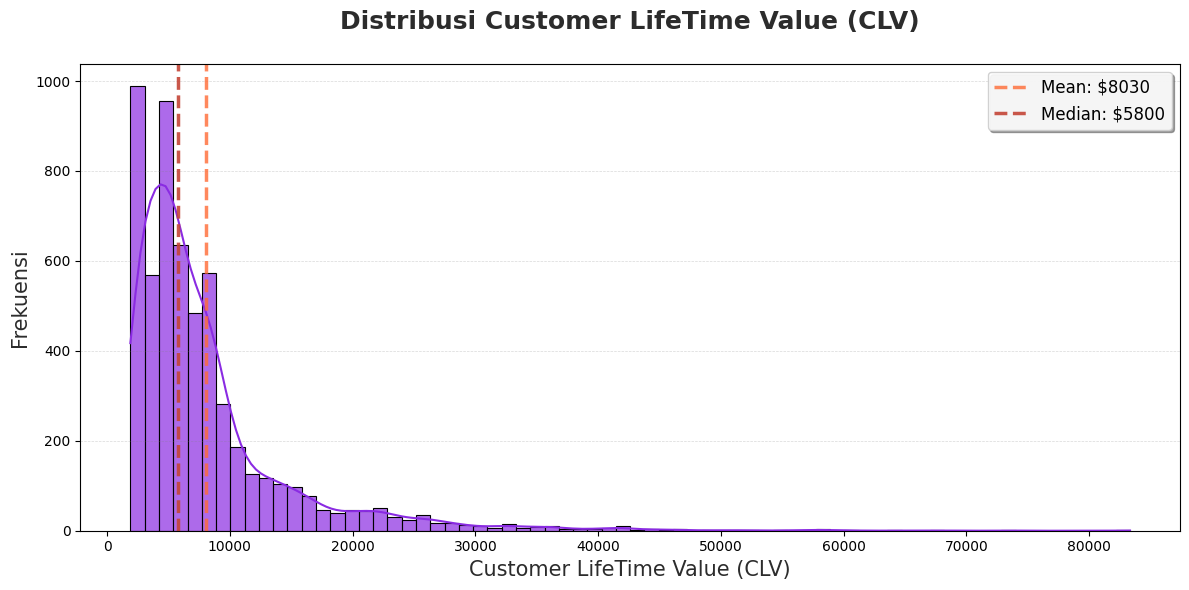

In [14]:
# Memvisualisasikan Distribusi Costumer LifeTime Value (CLV)

# Setup Figure
plt.figure(figsize=(12,6))

# Histogram
sns.histplot(
    df['Customer Lifetime Value'], 
    bins=70, 
    kde=True, 
    color='#8A2BE2',
    edgecolor='#000000',
    linewidth=0.8,
    alpha=0.7
)
plt.title('Distribusi Customer LifeTime Value (CLV)', 
          fontsize=18, pad=25, fontweight='bold', color='#2C2C2C')
plt.xlabel('Customer LifeTime Value (CLV)', fontsize=15, color='#2C2C2C')
plt.ylabel('Frekuensi', fontsize=15, color='#2C2C2C')

# Grid
plt.grid(axis='y', alpha=0.3, color='#808080', linestyle='--', linewidth=0.5)

# Mean Line
plt.axvline(df['Customer Lifetime Value'].mean(), 
           color='#FF6B35', linestyle='--', linewidth=2.5, 
           label=f'Mean: ${df["Customer Lifetime Value"].mean():.0f}', alpha=0.8)

# Median Line 
plt.axvline(df['Customer Lifetime Value'].median(),
           color='#C44536', linestyle='--', linewidth=2.5, 
           label=f'Median: ${df["Customer Lifetime Value"].median():.0f}', alpha=0.9)

plt.legend(fontsize=12, loc='upper right', framealpha=0.9, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

**Insight**

Dari distribusi CLV di atas dapat disimpulkan bahwa:
- Distribusi `Customer Lifetime Value (CLV)` terlihat sangat **Right-skewed**, di mana sebagian besar pelanggan memiliki CLV di bawah 10.000, sementara hanya sedikit nasabah atau customer yang mencapai nilai jauh lebih tinggi.
- Seperti yang telah di singgung juga pada bagian Data Overview, perbedaan signifikan antara mean (8030) dan median (5800) mengindikasikan adanya outlier yang menarik distribusi ke kanan. Temuan ini menunjukkan bahwa perusahaan di dominasi oleh nasabah dengan nilai CLV rata rata rendah, tapi juga terdapat segmen kecil nasabah bernilai tinggi yang harus dan sangat penting di pertahankan oleh perusahaan.

#### **Analisis Segmentasi Nasabah Berdasarkan Costumer LifeTime Value**

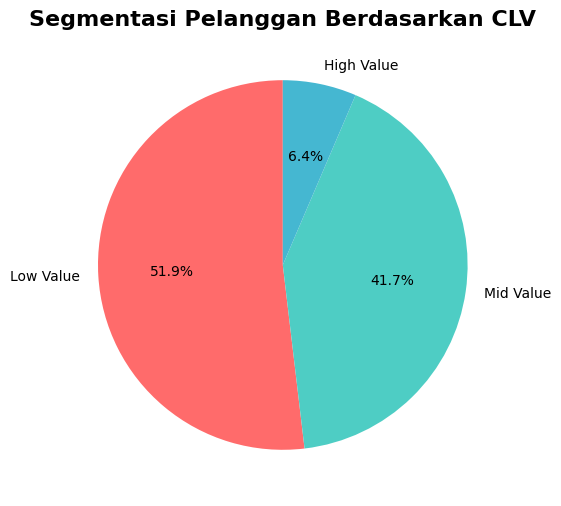

CLV Segment,Low Value,Mid Value,High Value
count,2941.000000,2363.000000,365.000000
mean,3987.711485,9889.470392,28560.769997
std,1182.094119,3286.772942,9296.503195
min,1898.007675,6005.027312,20003.140910
25%,2771.045031,7521.238618,22217.967960
50%,4061.590219,8663.363959,25640.240040
75%,5069.071361,11622.369755,32196.600370
max,5999.380228,19957.790340,83325.381190


In [8]:
# Analisis Segmentasi Pelanggan Berdasarkan CLV

# Menggunakan Threshold untuk segmentasi
df_segmented = df.copy()
low_threshold = 6000 # Batas bawah untuk segmen Low Value
high_threshold = 20000 # Batas atas untuk segmen High Value
df_segmented['CLV Segment'] = pd.cut(df_segmented['Customer Lifetime Value'],
                                     bins=[0,
                                           low_threshold,
                                           high_threshold,
                                           df_segmented['Customer Lifetime Value'].max()],
                                     labels=['Low Value', 'Mid Value', 'High Value'],
                                     include_lowest=True)

# Visualisasi Segmentasi CLV
plt.figure(figsize=(12, 6))
segment_counts = df_segmented['CLV Segment'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
plt.pie(segment_counts.values, labels=segment_counts.index, 
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Segmentasi Pelanggan Berdasarkan CLV', fontsize=16, fontweight='bold')
plt.show()

# Summary statistik per segmentasi
df_segmented.groupby('CLV Segment')['Customer Lifetime Value'].describe().T

**Insight**

Kalau kita lihat dengan threshold 6.000 dan 20.00 yang aku buat:

- Mayoritas nasabah (51,9%) masuk kategori `Mid Value`, dengan CLV rata rata sekitar 9.800. Ini adalah segmen inti perusahaan karena jumlahnya besar dan nilainya cukup tinggi, sehingga bisa menjadi target utama untuk strategi retensi.
- Nasabah `Low Value` (41,7%) memiliki CLV rata rata hanya sekitar 4.000, jauh di bawah rata rata keseluruhan. Walaupun jumlahnya signifikan, kontribusi ke total pendapatan relatif kecil. Segmen ini bisa menjadi fokus upselling atau cross-selling agar berpindah ke Mid.
- Segmen `High Value` hanya 6,4%, namun memiliki CLV rata rata 28.500, lebih dari 3 kali lipat segmen Mid. Walaupun sedikit, mereka adalah kontributor paling bernilai sehingga penting dijaga loyalitasnya dengan layanan premium atau personalisasi.

#### **Korelasi Fitur Prediktor Numerik terhadap CLV**

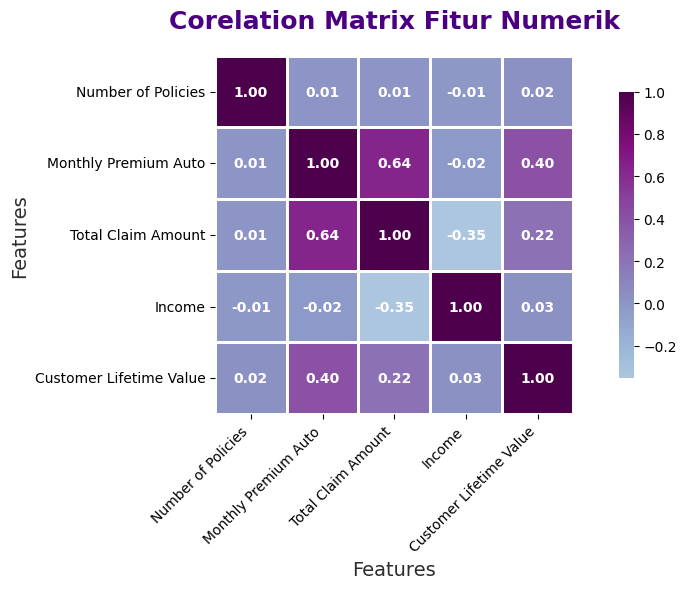

Korelasi Fitur Numerik dengan Customer Lifetime Value (CLV):

Monthly Premium Auto: 0.402
Total Claim Amount: 0.215
Income: 0.026
Number of Policies: 0.025


In [9]:
# variable untuk menyimpan fitur numerik
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df[numerical_features].corr()

# Heatmap Korelasi Fitur Numerik
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='BuPu',
            square=True,
            linecolor='white',
            linewidths=0.8,
            center=0,
            cbar_kws={"shrink": .8},
            fmt='.2f',
            annot_kws={'size': 10, 'weight': 'bold', 'color': '#FFFFFF'})

plt.title('Corelation Matrix Fitur Numerik', 
          fontsize=18, pad=20, fontweight='bold',color='#4B0082')
plt.xlabel('Features', fontsize=14, color='#2C2C2C')
plt.ylabel('Features', fontsize=14, color='#2C2C2C')

# Rotasi Label agar enak di baca
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Menampilkan korelasi fitur numerik dengan CLV secara ekplisit
print('Korelasi Fitur Numerik dengan Customer Lifetime Value (CLV):\n')
clv_correlations = correlation_matrix['Customer Lifetime Value'].drop('Customer Lifetime Value').sort_values(ascending=False)
for feature, corr in clv_correlations.items():
    print(f'{feature}: {corr:.3f}')

**Insight**

Kalau kita lihat dari korelasi di atas, kita menemukan bahwa:

- **Monthly Premium Auto** punya hubungan paling kuat dengan CLV (0.40). Ini menarik, karena dari data kelihatan nasabah dengan premi bulanan lebih tinggi cenderung punya CLV lebih besar. Hal ini bisa jadi logis, karena premi yang tinggi biasanya datang dari produk dengan nilai perlindungan yang lebih mahal, layanan cepat dan masih banyak lagi.
- **Total Claim Amount** juga punya kaitan dengan CLV, meskipun tidak sekuat premi bulanan. Bisa jadi masuk akal, karena makin besar klaimnya, berarti pelanggan cukup aktif menggunakan layanan, yang akhirnya tercermin dalam CLV. Claim besar pelangganpun senang.
- Jika pada bisnis lain **Income** ini adalah fitur yang sangat penting tapi ternyata beda urusan nya jikalau dalam bidang asuransi, Income dan **Number of Policies** nyaris tidak berkorelasi dengan CLV. Ini agak menarik, karena ternyata gaji tinggi atau punya banyak polis tidak otomatis membuat nasabah lebih bernilai jangka panjang.


#### **Visualisasi Hubungan Fitur Penting dengan CLV**

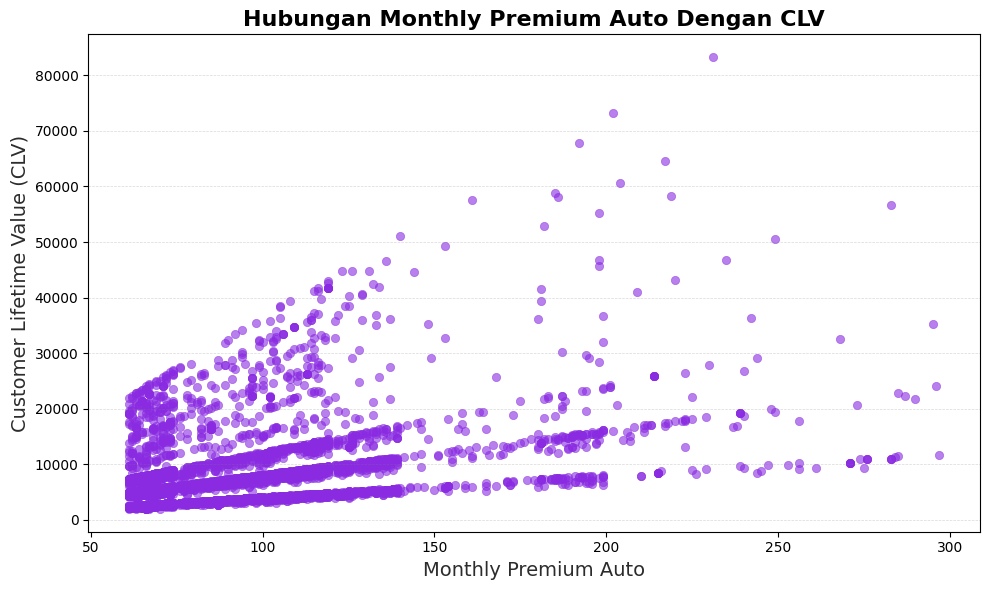

In [10]:
# Memvisualisasikan Monthly Premium Auto vs Customer Lifetime Value (CLV)

# Setup Figure
plt.figure(figsize=(10, 6))

# Scatter Plot
sns.scatterplot(data=df,
                x='Monthly Premium Auto',
                y='Customer Lifetime Value',
                color='#8A2BE2',
                alpha=0.6,
                edgecolor=None)

plt.title('Hubungan Monthly Premium Auto Dengan CLV', 
          fontsize=16, fontweight='bold', color='black')
plt.xlabel('Monthly Premium Auto', fontsize=14, color='#2C2C2C')
plt.ylabel('Customer Lifetime Value (CLV)', fontsize=14, color='#2C2C2C')
plt.grid(axis='y', alpha=0.3, color='#808080', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

**Insight**

- Setelah sebelumnya kita menemukan bahwa `Monthly Premium Auto` punya hubungan paling kuat dengan CLV, scatter plot ini semakin memperkuat temuan tersebut. Terlihat pola yang cukup jelas bahwa semakin tinggi premi bulanan, CLV cenderung ikut meningkat. 
- Menariknya, titik titik data juga membentuk sebuah lapisan lapisan yang kemungkinan mencerminkan perbedaan lama waktu nasabah bertahan. Jadi, bukan hanya besarnya premi yang memengaruhi CLV, tapi juga retensi nasabah yang mempertebal efek tersebut.